In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
from IPython.display import clear_output


print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Scikit-learn version:', sk.__version__)
print('Matplotlib version:', matplotlib.__version__)

%matplotlib inline

NumPy version: 1.12.1
Pandas version: 0.20.1
Scikit-learn version: 0.18.1
Matplotlib version: 2.0.2


In [2]:
columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
dfiris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None,names=columns)

In [3]:
dfiris['Class'] = dfiris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dfiris)

     Sepal Length  Sepal Width  Petal Length  Petal Width          Species  \
0             5.1          3.5           1.4          0.2      Iris-setosa   
1             4.9          3.0           1.4          0.2      Iris-setosa   
2             4.7          3.2           1.3          0.2      Iris-setosa   
3             4.6          3.1           1.5          0.2      Iris-setosa   
4             5.0          3.6           1.4          0.2      Iris-setosa   
5             5.4          3.9           1.7          0.4      Iris-setosa   
6             4.6          3.4           1.4          0.3      Iris-setosa   
7             5.0          3.4           1.5          0.2      Iris-setosa   
8             4.4          2.9           1.4          0.2      Iris-setosa   
9             4.9          3.1           1.5          0.1      Iris-setosa   
10            5.4          3.7           1.5          0.2      Iris-setosa   
11            4.8          3.4           1.6          0.2      I

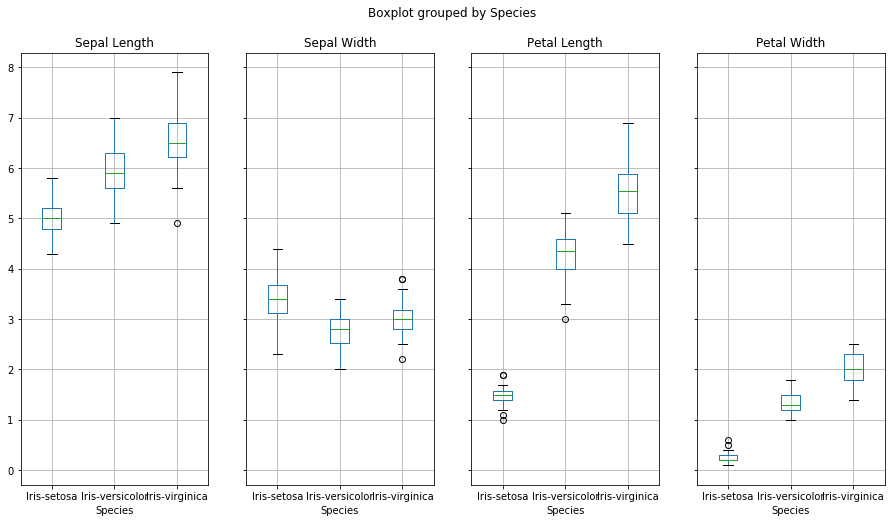

In [4]:
features = tuple(dfiris.columns[:4].values)
dfiris.boxplot(column=features, by='Species', figsize=(15,8), layout=(1,4));

In [5]:
x = dfiris[["Petal Length", "Petal Width"]]
y = dfiris["Class"]

scaler = StandardScaler().fit(x)
x = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=60)

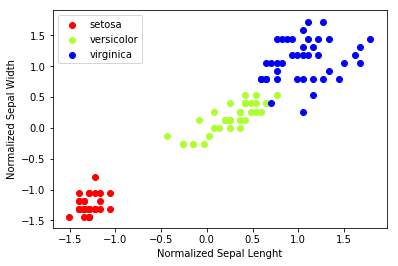

In [6]:
colors = ('red', 'greenyellow', 'blue')
for i in range(len(colors)):
    x1s = x_train[:, 0][y_train.as_matrix() == i]
    x2s = x_train[:, 1][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['setosa', 'versicolor', 'virginica'])   # maintain order from dataset preparation!
plt.xlabel('Normalized Sepal Lenght')
plt.ylabel('Normalized Sepal Width');

In [7]:
for i in range(len(colors)):
    x1s = x_train[:, 2][y_train.as_matrix() == i]
    x2s = x_train[:, 3][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['setosa', 'versicolor', 'virginica'])   # maintain order from dataset preparation!
plt.xlabel('Normalized Petal Lenght')
plt.ylabel('Normalized Petal Width');

IndexError: index 2 is out of bounds for axis 1 with size 2

In [10]:
def knn(trainset, labelsresult, point, k):
    dist = DistanceMetric.get_metric('euclidean')
    closest = []                                                        #We prepare an array to save the closests points in
    if (k < len(trainset)):                                             #You can't have more points than in the dataset.
        for i in range(0,k):
            closest.append([9999,0])
        for i in range(len(trainset)):
            distance = 0
            for c in range(len(trainset[0])):
                distance = distance + dist.pairwise(dist.pairwise([[point[c]], [trainset[i][c]]]))[0][1] #Add the distance between each feature to the total
            for c in range(0,k):
                if (distance < closest[c][0]):
                    closest[c][0] = distance
                    closest[c][1] = i
                    c = k

    result = []
    for x in np.nditer(labelsresult):
        result.append(int(x))
    predlabels = []
    for i in range(0,k):
        point = closest[i][1]
        predlabels.append(result[point])
    return max(set(predlabels), key=predlabels.count) #https://stackoverflow.com/a/1518632
knn(x_train, y_train, [2,3,1,1], 5)

2

### Preperation
We start using Euclidean Distance Metrics and saving it in the `dist` variable.
Then we prepare the closest array. In there we will store the 2 values, the distance to the point being tested and the index in the array. Before we start the entire method, we want to check if there are more training points than the k. We can not look for more points then are in the set. We want to add the amount of points equal to k. This can simply be done in a loop starting with the code bellow.
```py
dist = DistanceMetric.get_metric('euclidean')
    closest = []                                                       
    if (k < len(trainset)):                                            
        for i in range(0,k):
            closest.append([9999,0])
```
### Calculating the distance
To start off, we loop through all the training points to collect the closest points. Within that we loop through the features and add the distance to the `distance` variable. We get a total distance of all features together.
```py
for i in range(len(trainset)):
           distance = 0
           for c in range(len(trainset[0])):
               distance = distance + dist.pairwise(dist.pairwise([[point[c]], [trainset[i][c]]]))[0][1]
```
### Comparing the distance to the closest points so far
We want to know which point is the clostest to our current point, still within the trainset loop, we go through all of our earlier created closest points and check if the distance is  shorter than the one stored. If that is the case, we override the distance with the new one and save the index with it and end the loop through the closest points. If we do not close this one, all the points would have been overwritten instead of only one. We do this for every point to create an array of the closest points. The code for this action:
```py
for c in range(0,k):
    if (distance < closest[c][0]):
        closest[c][0] = distance
        closest[c][1] = i
        c = k
```
### Fixing the y_train label array
Because of the nature of NumPy and SKLearn, the original indexes from the point array get send through. That means the array is a mess of random indexes and values assigned to it. I am unsure why this does not happen to the trainset's features. Because of this we need to reindex the array. NumPy does not have an easy solution for this so instead we iterate over all the values in the array and add them to a new array. The result is an array with indexes equal from 0 to the size of the array.
This has been done with the following code.
```py
result = []
    for x in np.nditer(labelsresult):
        result.append(int(x))
```
### Getting the labels
We have the closest points and their index and a sorted array with the labels. It's time to combine both of these and get the labels that the closest points have in an array. This is a very simple action of looking what the value is of the index in the label array and adding that to our new array.
```py
predlabels = []
for i in range(0,k):
    point = closest[i][1]
    predlabels.append(result[point])
```
### Predicting the label
One last line to sum everything up, we need to check the array for which label is in the most. This can be done using a dictonary. Because there was some insecurity on how to make this work properly, there is a oneliner that we coppied from StackOverflow. resulting in the following line.
```py
return max(set(predlabels), key=predlabels.count) #https://stackoverflow.com/a/1518632
```

In [11]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define Method
def knnfull(trainset, labelset, testset, testlabel, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fitting the model
    knn.fit(trainset, labelset)
    #Predit the result
    ypred = knn.predict(testset)
    #Return the accuracy score
    return accuracy_score(testlabel, ypred)
#Execute the Method and see the result
print("SKLearn's accuracy: " + str(knnfull(x_train, y_train, x_test, y_test, 5)*100) + "%")

SKLearn's accuracy: 92.1052631579%


# Working with SKLearn
### Loading the library
To use kNN we need to import 2 libraries this can easy be done by this piece of code.
```py
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
```
### Defining the method
We want to make a method to easily use the SKLearn's kNN by sending a trainset, testset and the k. We do this by defining the method `knnfull`. This is done using this piece of code
```py
def knnfull(trainset, labelset, testset, testlabel, k):
```
#### Parameters:
    trainset:  The features that needs to be trained with.
    labelset:  The labels that belong to the trainset.
    testset:   The testset to test the accuracy.
    testlabel: The labels from the testset to test the accuracy.
    k:         The amount of neighbors that should be found.
### Defining knn
To start off we want to make an instance of the KNeighborsClassifier. Within this we need to define how many neighbors we want to find. This is our parameter k and can be done using the following line of code:
```py
knn = KNeighborsClassifier(n_neighbors=k)
```
### Fitting the data
We need to fit the data to the trainset so we can use it to predict other points. This is done by one line of code
```py
knn.fit(trainset, labelset)
```
We give it our trainset and labelset so it can group out the points.
### Predicting the data and calcuting the accuracy
Now we are done with training the model, we can start predicting other datapoints. We can use the `knn.predict` method to simply predict one point or an array of points at once. So when we want to get the labels back from our testset we can ask that in one line
```py
ypred = knn.predict(testset)
```
Now that we know what the model thinks it is, we want to measure it against the truth. SKLearn has a method build in to calculate the percentage.
```py
return accuracy_score(testlabel, ypred)
```
This means our method will return a float equal to the percentage of the accuracy.

In [12]:
def accuracyknn(x_train, y_train, x_test, y_test, k):
    right = 0
    errors = 0
    actual = []
    mistakes = []
    print("Please fill in 0 for no debuging or 1 for debugging")
    debug = bool(int(input()))
    for x in np.nditer(y_test):
        #print(x)
        actual.append(int(x))
    #Loop through all the test data
    for i in range(len(y_test)):
        try:
            predicted = knn(x_train, y_train, x_test[i], 5)
            value = actual[i]
            #Execute the method made before and check it with the correct value
            if(debug):
                print("Guessed: " + str(predicted))
                print("Actual: "+ str(value))
                print('=======')
            if(predicted == value):
                    right = right + 1
            else:
                mistakes.append([predicted, value])
        except KeyError as details:
            print(details)
            #Random KeyError is throw.
            errors = errors + 1
    if(debug == False):
        clear_output()
    print("Amount of cases: " + str(len(x_test)))
    print("Right perdiction: " + str(right))
    print("Amount with errors: " + str(errors))
    print("Accuracy with errors: " +str(right/len(x_test)*100)+"%")
    print("Accuracy without errors: " + str(right/(len(x_test)-errors)*100) + "%")
    if(len(mistakes)>0):
        print("Mistakes made:")
        for i in range(len(mistakes)):
            print("==============")
            print("Predicted: " + str(mistakes[i][0]))
            print("Actual: " + str(mistakes[i][1]))
accuracyknn(x_train, y_train, x_test, y_test, 5)

Amount of cases: 38
Right perdiction: 37
Amount with errors: 0
Accuracy with errors: 97.36842105263158%
Accuracy without errors: 97.36842105263158%
Mistakes made:
Predicted: 1
Actual: 2


# Calculating the accuracy
### Defining the method
To accomodate for the iris and wine dataset, we gave the accuracy method parameters. Originally this was hardcoded for only the iris dataset but to relief ourselves from doing twice the workload.
```py
def accuracyknn(x_train, y_train, x_test, y_test, k):
```
#### Parameters
    x_train: The part of the dataset ment for training
    y_train: The labels that correspond to the trainingset
    x_test:  The part of the dataset ment for testing
    y_test:  The labels that correspond to the testingset
    k:       The amount of neighbors that should be found
### Setting up our variables
To start of we are going to set a few variables to be used in the future.
```py
    right = 0
    errors = 0
    actual = []
    mistakes = []
    print("Please fill in 0 for no debuging or 1 for debugging")
    debug = bool(int(input()))
```
#### Variables
    right:    The amount of answers that were right.
    errors:   The amount of errors encountered.
    actual:   The right labels that come with the testset (more on that later)
    mistakes: The amount of mistakes made by the algorithm
    debug:    If the program should be run in debug mode.
              Debug mode will show all the predicted and right labels.
### Fixing the y_test
Like before we need to index the labels properly to prevent KeyErrors from occuring. This is done by the same method as before and saved in the `actual` variable.
```py
    for x in np.nditer(y_test):
        actual.append(int(x))
```
### Calculating the accuracy part 1
Now we have the proper values we can start the calculating process. We start by making a loop that will go through all of the values in `x_test`. These will be run through the `knn()` method, since this method returns the label that the point is supposed to be we can compare it to the label which belongs to this piece of data. We also temporarly set the label in the value variable. This just makes it easier to print out and work with in the future.
```py
for i in range(len(y_test)):
    try:
        predicted = knn(x_train, y_train, x_test[i], 5)
        value = actual[i]
```
##### Optional Debug Option
If we want to see if the calculations are done correctly, we want to see every prediction and actual label. If the `debug` variable is true, these should be printed out. This is done using the following piece of code:
```py
if(debug):
    print("Guessed: " + str(predicted))
    print("Actual: "+ str(value))
    print('=======')
```
### Calcuating the accuracy part 2
Now we have both values we can compare them and see if they are equal. If these are equal we want to up the `right` variable by one. If this is wrong, we save the mistake in the `mistakes` list. The mistake is saved as a list with the guessed value first and then the actual value.
```py
if(predicted == value):
    right = right + 1
else:
    mistakes.append([predicted, value])
```
We used a `try` in the beginning and that was for a reaosn, during experimentation we encountered multiple `KeyErrors`. Since we wanted to see the program run even with errors we added a try expect and wanted to count the errors.
```py
except KeyError as details:
    print(details)
    #Random KeyError is throw.
    errors = errors + 1
```
To make the user experience a bit more enjoyable we added a screen clear.
```py
if(debug == False):
    clear_output()
```
### Printing the results
Now the calculations are done we can print out all the values that were saved. We loop through the mistakes and print out all the predicted and actual labels.
```py
print("Amount of cases: " + str(len(x_test)))
print("Right perdiction: " + str(right))
print("Amount with errors: " + str(errors))
print("Accuracy with errors: " +str(right/len(x_test)*100)+"%")
print("Accuracy without errors: " + str(right/(len(x_test)-errors)*100) + "%")
if(len(mistakes)>0):
    print("Mistakes made:")
    for i in range(len(mistakes)):
        print("==============")
        print("Predicted: " + str(mistakes[i][0]))
        print("Actual: " + str(mistakes[i][1]))
```

In [15]:
print("Select your source: 0 = Iris, 1 = Wine")
dataset = int(input())
clear_output()
if(dataset == 0):
    df = dfiris
    print("Selected Iris.")
else:
    df = "wine"
    print("Selected Wine")
print("Select method: 0 = Own algorithm, 1 = SKLearn")
source = int(input())
clear_output()
print("Please input the k")
k = int(input())
clear_output()
if(source == 0):
    accuracyknn(x_train, y_train, x_test, y_test, k)
else:
    print("Accuracy " + str(knnfull(x_train, y_train, x_test, y_test, k)*100)+"%")

Amount of cases: 38
Right perdiction: 37
Amount with errors: 0
Accuracy with errors: 97.36842105263158%
Accuracy without errors: 97.36842105263158%
Mistakes made:
Predicted: 1
Actual: 2
